In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

In [31]:
df = pd.read_csv('credit_card.csv')

In [32]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [33]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           2
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [34]:
missing=df.AGE.mean()

In [35]:
df.AGE= df.AGE.fillna(missing)

In [36]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.000000,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.000000,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,35.485499,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,35.485499,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.000000,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.000000,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.000000,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.000000,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.000000,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [37]:
x = df.drop(['default.payment.next.month'],axis=1)
x = x.drop(['ID'],axis=1)

In [38]:
y = df['default.payment.next.month']

In [39]:
x.shape

(30000, 23)

In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state=1)

In [41]:
xtrain

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
26340,150000.0,2,1,2,26.0,0,0,2,0,0,...,63156.0,57147.0,53383.0,48556.0,4850.0,2000.0,2000.0,2000.0,2000.0,1500.0
3877,50000.0,2,2,2,23.0,0,0,0,0,0,...,42162.0,6765.0,19286.0,9558.0,2000.0,2102.0,255.0,3000.0,191.0,0.0
27081,80000.0,1,2,2,31.0,0,0,0,0,0,...,72368.0,77505.0,78845.0,74182.0,3000.0,3500.0,7000.0,3100.0,3000.0,3000.0
5440,120000.0,2,2,2,39.0,0,0,2,0,0,...,24372.0,24670.0,25617.0,26535.0,2400.0,1000.0,1000.0,1500.0,1500.0,1500.0
22164,150000.0,2,1,3,30.0,1,-1,2,-1,-1,...,6527.0,2168.0,-7.0,1373.0,0.0,8589.0,2500.0,0.0,1380.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17289,170000.0,2,3,1,40.0,1,2,0,0,0,...,20619.0,19520.0,5200.0,0.0,0.0,2000.0,1136.0,1000.0,0.0,36679.0
5192,330000.0,2,1,1,41.0,-1,-1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12172,50000.0,1,2,2,22.0,0,0,0,0,0,...,35458.0,19778.0,19929.0,19790.0,1707.0,1321.0,687.0,705.0,811.0,874.0
235,80000.0,1,1,2,35.0,-1,-1,-1,-1,-1,...,6848.0,1719.0,1378.0,19942.0,3983.0,6853.0,1719.0,1378.0,19942.0,2418.0


In [42]:
model = SVC(gamma = 'auto')

In [43]:
model.fit(xtrain,ytrain)

SVC(gamma='auto')

In [45]:
model.score(xtest,ytest)

0.7792

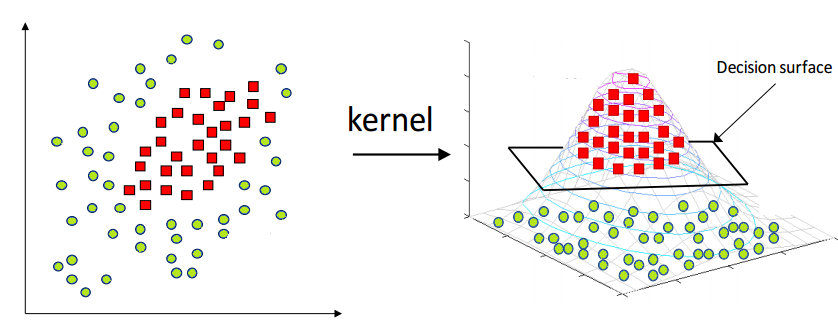

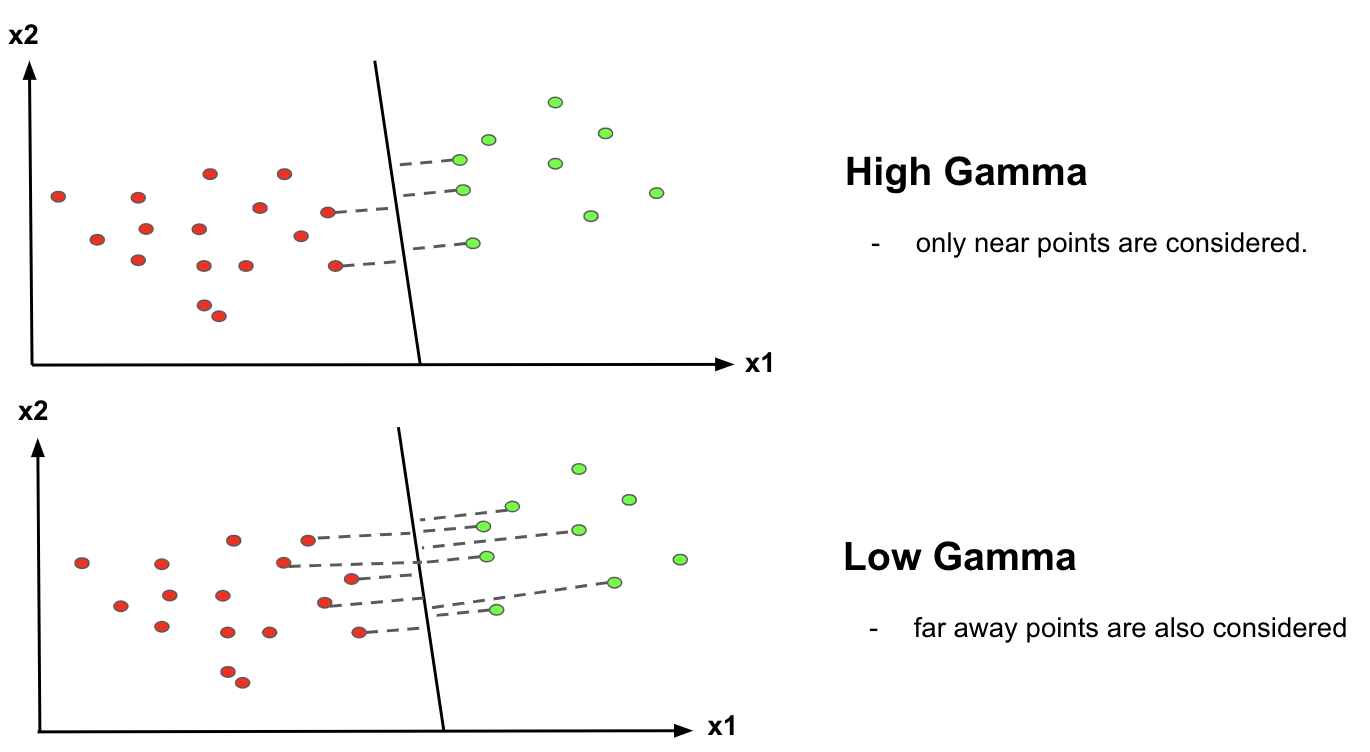

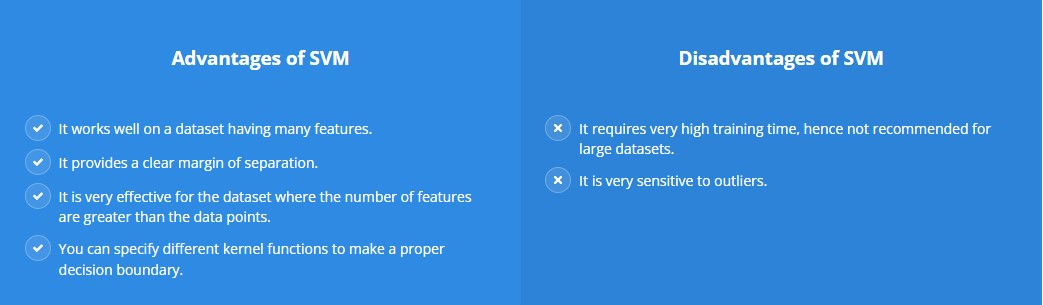

**The linear kernel** is mostly preferred for text classification problems as it performs well for large datasets.

**Gaussian kernels** tend to give good results when there is no additional information regarding data that is not available.

**Rbf kernel** is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.

**Polynomial kernels** give good results for problems where all the training data is normalized. **